# 20180717 필기

### 이제는 조금더 범용적이고 많이 쓰는 것!
- 어제 했던 거는 잊어도 돼

In [2]:
import requests
from bs4 import BeautifulSoup

In [4]:
headers = {
    "user-agent":"Mozilla/5.0 (iPad; CPU OS 11_0 like Mac OS X) AppleWebKit/604.1.34 (KHTML, like Gecko) Version/11.0 Mobile/15A5341f Safari/604.1"
}

params = {
    "q":"한글"
}
url = "http://www.google.com/search"

In [5]:
html = requests.get(url, params=params, headers=headers)

### utf-8이라 읽는데 지장 없지?

In [6]:
html.encoding

'UTF-8'

### BeautifulSoup의 최 상위 객체 dom 만들어보자
- 속도 때문에 "lxml"을 사용

In [7]:
dom = BeautifulSoup(html.text, "lxml")

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="telephone=no" name="format-detection"><meta content="address=no" name="format-detection"><meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,,shrink-to-fit=no" name="viewport"><meta content="origin" name="referrer"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="icon"><link href="/images/branding/product_ios/3x/gsa_ios_60dp.png" rel="apple-touch-icon" sizes="180x180"><link href="/images/branding/product_ios/2x/gsa_ios_60dp.png" rel="apple-touch-icon" sizes="120x120"><link href="/images/branding/product_ios/2x/gsa_ios_57dp.png" rel="apple-touch-icon" sizes="114x114"><link href="/images/branding/product_ios/1x/gsa_ios_57dp.png" rel="apple-touch-icon"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>한글 - Google 검색</title><script nonce="IIvOqUXR4K3qK3S+53AnGA==">(function(
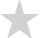
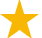
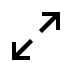
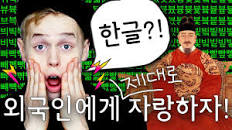
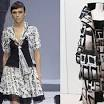

In [8]:
html.text

### 모든 anchor 태그를 찾을 거야

In [11]:
aList = dom.select("a.C8nzq")

In [12]:
aList

[<a class="C8nzq JTuIPc" href="http://www.hancom.com/downLoad.downPU.do" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=http://www.hancom.com/downLoad.downPU.do&amp;ved=2ahUKEwjrnp3VzKjcAhUId94KHWVMCoQQFjAOegQIARAB"><div aria-level="3" class="MUxGbd v0nnCb" role="heading">다운로드 : 한글과컴퓨터 - Hancom</div><div class="zbELhe MUxGbd lyLwlc aLF0Z"><span class="qzEoUe">www.hancom.com › downLoad.downPU...</span></div></a>,
 <a class="C8nzq JTuIPc" href="https://www.hancom.com/product/productWindowsMain.do" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.hancom.com/product/productWindowsMain.do&amp;ved=2ahUKEwjrnp3VzKjcAhUId94KHWVMCoQQFjAPegQIBBAB"><div aria-level="3" class="MUxGbd v0nnCb" role="heading">한컴오피스 - Windows : 한글과컴퓨터</div><div class="zbELhe MUxGbd lyLwlc aLF0Z"><span class="qzEoUe">https://www.hancom.com › product › pr...</span></div></a>,
 <a class="C8nzq JTuIPc" href="https://namu.wiki/w/%ED%95%9C%EA%B8%80" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://namu.

### div class 이름이 rc 인 요소들 가져오기

In [206]:
for link in aList:
    print(link["href"])

https://namu.wiki/w/%ED%95%9C%EA%B8%80
http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html


In [225]:
def getUrl(url, params=None, num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500<=html.status_code<600 and num_retries > 0:
        print(html.status_code, html.reason)
        # 재귀적으로 호출하므로 총 3번 실행된다.
        return getUrl(url, params, num_retries-1)
    dom = BeautifulSoup(html.text, "lxml")
    links = dom.select("div.ZINbbc > div.U3THc > div > div > a.C8nzq")
    
    # link.has_attr("href") 속성이 있으면, href속성을 가진 list를 만들어 출력해라
    
    return [link["href"] for link in links if link.has_attr("href")==True]

In [226]:
links = getUrl(url, params)

In [227]:
links

['https://namu.wiki/w/%ED%95%9C%EA%B8%80',
 'http://www.hancom.com/downLoad.downPU.do',
 'https://www.hancom.com/product/productWindowsMain.do',
 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80',
 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8',
 'https://www.korean.go.kr/hangeul/principle/001.html']

In [233]:
seed = "https://www.google.com/search"
queue = [seed] #list를 queue 처럼 쓰기

In [234]:
while queue:
    url = queue.pop()
    print(url)
    queue.extend(getUrl(url, params))
    print(url, len(queue))
    select="a"

https://www.google.com/search
https://www.google.com/search 6
https://www.korean.go.kr/hangeul/principle/001.html
https://www.korean.go.kr/hangeul/principle/001.html 5
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8 4
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80 3
https://www.hancom.com/product/productWindowsMain.do
https://www.hancom.com/product/productWindowsMain.do 2
http://www.hancom.com/downLoad.downPU.do
http://www.hancom.com/downLoad.downPU.do 1
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://namu.wiki/w/%ED%95%9C%EA%B8%80 0


### accept-encoding : false를 사용하면 자체적인 euc-kr 인코딩을 날려버릴 수 있다.

In [235]:
headers = {
    "user-agent":"Mozilla/5.0 (iPad; CPU OS 11_0 like Mac OS X) AppleWebKit/604.1.34 (KHTML, like Gecko) Version/11.0 Mobile/15A5341f Safari/604.1",
    "accept-encoding":"false"
}

params = {
    "q":"한글"
}
url = "https://www.google.com/search"

In [254]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"
html = requests.get(seed, params=params, headers=headers)
getUrl(seed, params)

[]

In [255]:
html.encoding

'euc-kr'

In [256]:
html.content.decode("euc-kr")

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="author" content="PPOMPPU CO.">\n<meta name="description" content="뽐뿌">\n<meta name="keywords" content="">\n\n\n<!--\n<meta name="viewport" content="width=device-width, initial-scale=0.98, minimum-scale=0.98, user-scalable=yes" />\n\n-->\n\n\n<meta property="og:image" content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" />\n\n<meta property="og:site_name" content="뽐뿌" />\n\n<title>뽐뿌 - 자유게시판</title><!--<link href=\'http://fonts.googleapis.com/css?family=Noto+Sans\' rel=\'stylesheet\' type=\'text/css\'>-->\n\n<link rel="stylesheet" type="text/css" href="//www.ppomppu.co.kr/cs

In [326]:
def getUrl(url, params=None,select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500<=html.status_code<600 and num_retries > 0:
        print(html.status_code, html.reason)
        # 재귀적으로 호출하므로 총 3번 실행된다.
        return getUrl(url, params, num_retries-1)
    dom = BeautifulSoup(html.text, "html.parser")
    links = dom.select(select)
    
    # link.has_attr("href") 속성이 있으면, href속성을 가진 list를 만들어 출력해라
    return [link["href"] for link in links if link.has_attr("href") == True]

In [329]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"

# html = requests.get(seed, params=params, headers=headers)
contentList = getContent(seed, None, select="td.list_vspace img + a")
contentList = contentList[1:]

In [330]:
contentList

[<a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5952046"><font class="list_title">자동차 보험 삼성화재 --&gt; DB손해보험으로 갈아 타려고 준비 중입니다 ㅎㅎ</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5952045"><font class="list_title">냉방병이 엄청 무섭네요...</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5952044"><font class="list_title">오늘자 개적개.news</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5952043"><font class="list_title">지하철인데 왠할매가 개를 풀어놨네요</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5952042"><font class="list_title">우리나라 외식 영화 비율이 많이 높죠</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5952041"><font class="list_title">‘밑 빠진 독’ 천안야구장에 수십억 혈세 추가 투입 논란.jpg</font></a>,
 <a href="view.php?id=freeboard&amp;page=1&amp;divpage=1111&amp;no=5952040"><font class="list_title">홍미노트5  출고가 299,200원</font></a>,
 <a href="view.php?id=freeboard&amp;p

------

## Scraping

### 뽐뿌 게시글제목, 내용, 댓글 가져오기 

In [333]:
contentList

['view.php?id=freeboard&page=1&divpage=1111&no=5952045',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952043',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952041',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952039',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952037',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952035',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952033',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952031',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952029',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952027',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952025',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952023',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952021',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952019']

In [335]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"

# html = requests.get(seed, params=params, headers=headers)
contentList = getUrl(seed, params, select="tr.list1 > td.list_vspace img + a")
contentList = contentList[1:]
# for cont in contentList:
#     print(cont.get_text().strip())

In [336]:
contentList

['view.php?id=freeboard&page=1&divpage=1111&no=5952047',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952045',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952043',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952041',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952039',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952037',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952035',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952033',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952031',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952029',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952027',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952025',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952023',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952021']

In [292]:
def getContent(url, params=None,select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500<=html.status_code<600 and num_retries > 0:
        print(html.status_code, html.reason)
        # 재귀적으로 호출하므로 총 3번 실행된다.
        return getUrl(url, params, num_retries-1)
    dom = BeautifulSoup(html.text, "html.parser")
    links = dom.select(select)
    
    # link.has_attr("href") 속성이 있으면, href속성을 가진 list를 만들어 출력해라
    return links

In [375]:
seed = "http://www.ppomppu.co.kr/zboard/"

for url in contentList:
    replynameList=[]
    replycontentList=[]
    # 제목 뽑기
    title = getContent(seed+url, params=params, select=".view_title2")
    # 내용 뽑기
    content = getContent(seed+url, params, select="table.pic_bg table table td,han")
    reply_name = getContent(seed+url, params, select="div#quote table.info_bg tbody tr td td td td td b")
    reply = getContent(seed+url, params, select="div#quote div.han")
    print("==========================================================")
    print("제목 > ", title[0].get_text())
    print("내용 > ")
    print(content[0].get_text().strip())
    print("==========댓글입니다========================================")
    
    for comment in reply:
        print("- ",comment.get_text())
#     for comment in reply:
#         replycontentList.append(comment.get_text())
#     for comment in reply_name:
#         replynameList.append(comment.get_text())
#     for i in range(len(replycontentList)):
#         print(replynameList[i],"-",replycontentList[i])
    print("")

제목 >  방금 저번 엘지전자 이름 이벤트 기프티콘 들어왔어요
내용 > 
더베스트 지성?? 머지 하고 생각하다가

저번에 옥션인가 지마켓 에르지 세탁기 이름 짓는거엿군요 ㅎㅎ

이디야 아메리카노 더운날에 한줄기 빗방울이네요 ㅎㅎ
==========댓글입니다========================================
-  저도 뭔가하고 구글링하다가 지마켓 일등엘지 보이는거보고 아하 했네요 ㅋㅋ
-  추첨한다더니 100% 지급인가 보네요.
-  저도 들어왔네요
-  왕 벌써요? 전 아직 없는데 기다려봐야겟네용
-  전 암것도 안왔는데

제목 >  냉방병이 엄청 무섭네요...
내용 > 
너무 더워서 에어컨 풀로 쒜다가 걸렸는데
감기 비슷하게 피로하고 무기력해서
타이레놀 먹고 기절했네요 ㅠㅠ
==========댓글입니다========================================
-  에어콘 직풍 자리는 진짜 냉방병 걸리기 딱 ㅠ
감기 조심하세요~
-  더워죽은사람도 있는데...
-  저도 에어컨 바람 직타로 맞고 고생 여러번 했어요ㅎㅎ
-  다이렉트로 쒜면 안되더군요.. 바로 걸려요 ㅠㅠ
-  에어컨 22도로 틀어놓고 샤워후 물기안말리고 직빵으로 쐬는데 ㄷㄷㄷ 그러지 말아야겠네여....
-  쏘이다
-  제일 위험한거라더군요 좀 턴을두고 껏다 켰다 해야 된다고.. ㄷㄷ
-  맞아요...작년에 죽다 살았났었어요...인생 감기로 정말 끔찍하게 아팠던 기억이..
-  인버터라 빵빵하게 틀었는데 후우...
-  더 환장하는건 더운데 에어컨 바람 못쐐는거죠
여름감기 ㄷㄷ
-  안틀고 버티고있습니다 후우...

제목 >  지하철인데 왠할매가 개를 풀어놨네요
내용 > 
분명히 케이지안에 넣어야 하는데...

케이지 바깥으로 꺼내서 사람앉는곳에 올려둠...

헛참...
==========댓글입니다========================================
-  미개하죠 ㅋㅋ
-  제목은 jpg인데 사진은 어디에??
-  복날이니 때려잡수라 이건

In [351]:
url=None